In [4]:
# Data collection

import pandas as pd
df = pd.read_csv('AAPL.csv')
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-08-05 00:00:00+00:00,440.25,441.57,435.5900,437.510,30497988,439.439245,440.756814,434.787826,436.704291,30497988,0.00,1.0
1253,AAPL,2020-08-06 00:00:00+00:00,455.61,457.65,439.1900,441.620,50607225,454.770958,456.807201,438.381197,440.806722,50607225,0.00,1.0
1254,AAPL,2020-08-07 00:00:00+00:00,444.45,454.70,441.1700,452.820,49511403,444.450000,454.700000,441.170000,452.820000,49511403,0.82,1.0
1255,AAPL,2020-08-10 00:00:00+00:00,450.91,455.10,440.0000,450.400,53100856,450.910000,455.100000,440.000000,450.400000,53100856,0.00,1.0
1256,AAPL,2020-08-11 00:00:00+00:00,437.50,449.93,436.4267,447.875,46975594,437.500000,449.930000,436.426700,447.875000,46975594,0.00,1.0


In [5]:
df1 = df.reset_index()['close']
df1

0       115.96
1       117.16
2       116.50
3       115.01
4       112.65
         ...  
1252    440.25
1253    455.61
1254    444.45
1255    450.91
1256    437.50
Name: close, Length: 1257, dtype: float64

# LSTM are very sensitive to scale of a data hence, applying min max scaler

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.0701399 ],
       [0.07342514],
       [0.07161825],
       ...,
       [0.96944726],
       [0.98713281],
       [0.95042024]])

# Splitting into training and test sets

In [9]:
training_len = int(0.65* len(df1))
test_len = len(df1) - training_len

train_set = df1[0:training_len,:]
test_set = df1[training_len:,:]

#  Sliding window data sets

In [10]:
def make_dataset(win_len,train_set):

    X_train = np.zeros([len(train_set)-(win_len+1),win_len])
    y_train = np.zeros([len(train_set)-(win_len+1),1])
    
    
    for i in range(0,len(train_set)-(win_len+1)):

        X_t = train_set[i:win_len+i,:]
        y_t = train_set[win_len+i,:]


        X_train[i,:] =  np.array(X_t).reshape(1,-1)
        y_train[i,:] =  np.array(y_t).reshape(1,-1)
        
    return X_train,y_train
    

# Preparing training testing data

In [11]:
win_len = 100

X_train,y_train= make_dataset(win_len,train_set)
X_test,y_test= make_dataset(win_len,test_set)

# Before Implementing LSTM we need to reshape the input to a 3d vector 
# (m,Tx,[size of each time step])

In [12]:


X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

X_train.shape

(716, 100, 1)

# Create LSTM model

In [13]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [14]:
# Creating model
embedding_vector_features=40

model=Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1))) 

model.add(LSTM(50,return_sequences=True))

model.add(LSTM(50))

model.add(Dense(10,activation='relu'))

model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 51,321
Trainable params: 51,321
Non-trainable params: 0
_________________________________________________________________


# Fitting the model

In [17]:
res = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Train on 716 samples, validate on 339 samples
Epoch 1/50
716/716 [==============================] - 1s 2ms/step - loss: 1.0862e-04 - val_loss: 0.0011
Epoch 2/50
716/716 [==============================] - 2s 2ms/step - loss: 8.8557e-05 - val_loss: 7.0519e-04
Epoch 3/50
716/716 [==============================] - 2s 2ms/step - loss: 9.3678e-05 - val_loss: 4.9802e-04
Epoch 4/50
716/716 [==============================] - 1s 2ms/step - loss: 8.1028e-05 - val_loss: 6.7698e-04
Epoch 5/50
716/716 [==============================] - 1s 2ms/step - loss: 8.3304e-05 - val_loss: 9.6641e-04
Epoch 6/50
716/716 [==============================] - 1s 2ms/step - loss: 9.1661e-05 - val_loss: 5.1498e-04
Epoch 7/50
716/716 [==============================] - 1s 2ms/step - loss: 7.8820e-05 - val_loss: 4.8236e-04
Epoch 8/50
716/716 [==============================] - 2s 2ms/step - loss: 7.5275e-05 - val_loss: 4.7431e-04
Epoch 9/50
716/716 [==============================] - 2s 2ms/step - loss: 7.9126e-05 - val_los

In [22]:
model.save('model.h5')

# Lets Do the prediction and check performance metrics

In [25]:
from keras.models import load_model
model = load_model('model.h5')
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

# Transform back to original form

In [19]:

df1 = scaler.inverse_transform(np.array(df1).reshape(-1,1))
train_predict=scaler.inverse_transform(np.array(train_predict).reshape(-1,1))
test_predict=scaler.inverse_transform(np.array(test_predict).reshape(-1,1))

# Plotting the stock prices

In [20]:
pred1 = np.zeros(df1.shape)*np.nan
pred2 = np.zeros(df1.shape)*np.nan
pred1[win_len:win_len+len(train_predict),:] = train_predict
pred2[((2*win_len)+len(train_predict)+2):,:] = test_predict

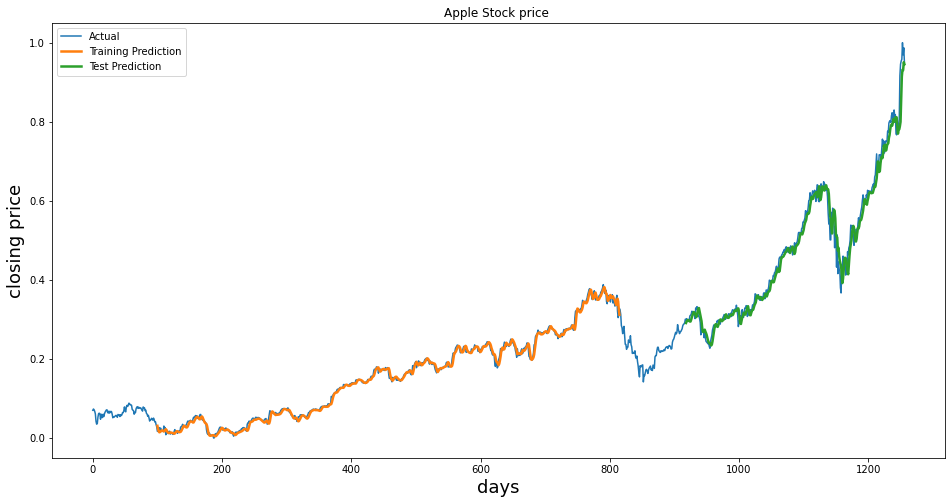

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))

plt.xlabel('days',fontsize = 18)

plt.ylabel('closing price',fontsize = 18)

plt.title('Apple Stock price ')


plt.plot(df1, label = "Actual")
plt.plot(pred1,linewidth=2.5, label = "Training Prediction")
plt.plot(pred2,linewidth=2.5, label = "Test Prediction")

plt.legend()

plt.show()